# Task 1 
Datasets posted with the project (“Data1.csv”, “Data2.csv”, “Data3.csv”, “Data4.csv”, “Data5.csv”) contain the data points and their respective class information. For each of the 5 datasets, follow the steps below: 
1. Use K-means and hierarchical clustering methods to generate clusters. 
2. Evaluate the performance of the clustering algorithm using external validation metrics. 
3. Plot (2D or 3D) the data points for each dataset and color them according to the original class 
4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by each clustering algorithm

## Pre-work: import libs and data sets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Clustering methods
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Evaluation metrics
from sklearn import metrics
from validclust import dunn


In [ ]:
df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv('Data2.csv')
df3 = pd.read_csv('Data3.csv')
df4 = pd.read_csv('Data4.csv')
df5 = pd.read_csv('Data5.csv')


In [ ]:
# backup data sets
bkdf1 = df1
bkdf2 = df2
bkdf3 = df3
bkdf4 = df4
bkdf5 = df5


All 5 data sets follow this process:
1. See data 
2. See na. (no na, no need to deal na)
3. Standardize data

In [ ]:
df1

,Unnamed: 0,X1,X2,X3,Class
0,1,-4.822490,-50.402170,4.020861,1
1,2,-44.460120,20.964670,-11.492060,1
2,3,50.001020,0.780748,9.134460,1
3,4,-41.699080,-22.310060,16.314120,1
4,5,4.425242,-4.666664,50.223740,1
...,...,...,...,...,...
795,796,-1.531027,0.681636,0.543271,2
796,797,0.500754,-1.848209,0.605654,2
797,798,1.089574,-0.246493,-3.355758,2
798,799,-1.907717,4.964502,2.098423,2


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  800 non-null    int64  
 1   X1          800 non-null    float64
 2   X2          800 non-null    float64
 3   X3          800 non-null    float64
 4   Class       800 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 31.4 KB


In [ ]:
# df1
# Standardize Data
df1_feature = df1.iloc[:, 1:4]
scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1_feature), columns = df1_feature.columns)
df1['Class'] = bkdf1['Class']
df1

,X1,X2,X3,Class
0,-0.224462,-2.680314,0.133595,1
1,-2.337375,1.185586,-0.514761,1
2,2.697945,0.092235,0.347316,1
3,-2.190196,-1.158581,0.647388,1
4,0.268495,-0.202848,2.064627,1
...,...,...,...,...
795,-0.049009,0.086866,-0.011749,2
796,0.059297,-0.050174,-0.009142,2
797,0.090684,0.036590,-0.174707,2
798,-0.069088,0.318866,0.053248,2


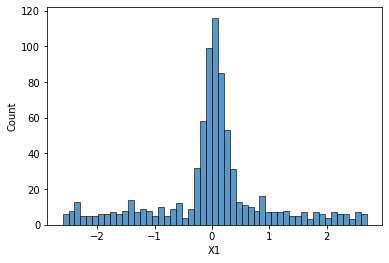

In [ ]:
sns.histplot(df1["X1"])
plt.show()

In [ ]:
df2

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.45300,-0.8910,0.02300,1
1,2,0.65300,-0.8460,0.02110,1
2,3,0.39800,0.9130,-0.00139,1
3,4,0.09520,1.0500,0.00628,1
4,5,0.52400,-0.9410,0.03780,1
...,...,...,...,...,...
995,996,0.01520,0.0531,-0.36100,2
996,997,0.05160,0.6910,0.87500,2
997,998,-0.00511,1.3900,-0.94700,2
998,999,-0.06710,0.7140,0.88100,2


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   X1          1000 non-null   float64
 2   X2          1000 non-null   float64
 3   X3          1000 non-null   float64
 4   Class       1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [ ]:
# df2
# Standardize Data
df2_feature = df2.iloc[:, 1:4]
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2_feature), columns = df2_feature.columns)
df2['Class'] = bkdf2['Class']
df2

,X1,X2,X3,Class
0,-0.908199,-1.509643,0.063015,1
1,1.348445,-1.458211,0.059138,1
2,0.828152,0.552221,0.013250,1
3,0.210329,0.708804,0.028900,1
4,1.085238,-1.566790,0.093212,1
...,...,...,...,...
995,0.047100,-0.430593,-0.720485,2
996,0.121369,0.298488,1.801406,2
997,0.005660,1.097403,-1.916139,2
998,-0.120822,0.324776,1.813648,2


In [ ]:
df3

,Unnamed: 0,X1,X2,X3,Class
0,1,1.295428,0.050829,-0.385217,1
1,2,1.409178,-0.035191,-0.251980,1
2,3,1.096803,0.246365,-0.415011,1
3,4,1.463328,0.265354,-0.513488,1
4,5,1.603284,0.080577,-0.470257,1
...,...,...,...,...,...
395,396,0.795695,0.209456,1.880609,4
396,397,0.653127,-0.703156,1.549448,4
397,398,-0.726249,-0.103244,0.694300,4
398,399,0.808596,-0.492640,1.649370,4


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   X1          400 non-null    float64
 2   X2          400 non-null    float64
 3   X3          400 non-null    float64
 4   Class       400 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 15.8 KB


In [ ]:
# df3
# Standardize Data
df3_feature = df3.iloc[:, 1:4]
scaler = StandardScaler()
df3 = pd.DataFrame(scaler.fit_transform(df3_feature), columns = df3_feature.columns)
df3['Class'] = bkdf3['Class']
df3

,X1,X2,X3,Class
0,1.321572,0.130595,-0.456249,1
1,1.449107,0.033830,-0.307459,1
2,1.098876,0.350555,-0.489521,1
3,1.509820,0.371916,-0.599494,1
4,1.666736,0.164059,-0.551216,1
...,...,...,...,...
395,0.761278,0.309036,2.074077,4
396,0.601432,-0.717569,1.704258,4
397,-0.945107,-0.042723,0.749285,4
398,0.775742,-0.480758,1.815844,4


In [ ]:
df4

,Unnamed: 0,X,Y,C,Class
0,X1,3.277701,0.814082,0.326574,1
1,X2,0.387577,0.176780,0.888046,1
2,X3,0.268546,0.582963,0.080981,1
3,X4,2.031145,0.244597,0.643921,1
4,X5,0.188677,0.461280,0.496633,1
...,...,...,...,...,...
399,X400,3.248655,2.297291,3.388138,3
400,X,4.100000,5.100000,0.504558,4
401,X.1,3.900000,4.900000,0.941634,4
402,X.2,4.000000,5.000000,0.702123,4


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  404 non-null    object 
 1   X           404 non-null    float64
 2   Y           404 non-null    float64
 3   C           404 non-null    float64
 4   Class       404 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
# df4
# Standardize Data
df4_feature = df4.iloc[:, 1:4]
scaler = StandardScaler()
df4 = pd.DataFrame(scaler.fit_transform(df4_feature), columns = df4_feature.columns)
df4['Class'] = bkdf4['Class']
df4

,X,Y,C,Class
0,1.220139,-0.671883,-0.889444,1
1,-1.403171,-1.101525,-0.263719,1
2,-1.511213,-0.827694,-1.163142,1
3,0.088664,-1.055806,-0.535781,1
4,-1.583708,-0.909727,-0.699923,1
...,...,...,...,...
399,1.193774,0.328033,2.522479,3
400,1.966523,2.217501,-0.691092,4
401,1.784987,2.082669,-0.203998,4
402,1.875755,2.150085,-0.470918,4


In [ ]:
df5

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,1
1,2,-0.000731,0.048211,0.069198,1
2,3,-0.060767,-0.009080,0.053085,1
3,4,0.013252,-0.011876,0.055324,1
4,5,-0.054508,-0.003813,0.001738,1
...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,7
208,209,0.396046,-0.858377,-3.126866,7
209,210,-0.406362,-0.334541,-2.885598,7
210,211,-0.299275,0.071281,-3.642585,7


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  212 non-null    int64  
 1   X1          212 non-null    float64
 2   X2          212 non-null    float64
 3   X3          212 non-null    float64
 4   Class       212 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 8.4 KB


In [ ]:
# df5
# Standardize Data
df5_feature = df5.iloc[:, 1:4]
scaler = StandardScaler()
df5 = pd.DataFrame(scaler.fit_transform(df5_feature), columns = df5_feature.columns)
df5['Class'] = bkdf5['Class']
df5

,X1,X2,X3,Class
0,-0.047871,-0.003870,0.035883,1
1,-0.009824,0.008417,0.064508,1
2,-0.046346,-0.025960,0.054592,1
3,-0.001317,-0.027637,0.055970,1
4,-0.042538,-0.022799,0.022994,1
...,...,...,...,...
207,0.097529,-0.052600,-1.660410,7
208,0.231550,-0.535570,-1.902329,7
209,-0.256584,-0.221249,-1.753855,7
210,-0.191439,0.022260,-2.219700,7


## Overview: Perform 4 steps on each of 5 data sets in turn

### 1. Data set 1

### 1.1 Step1: Use K-means and hierarchical clustering methods to generate clusters.

In [ ]:
display(df1.head())
display(df1["Class"].value_counts())

,X1,X2,X3,Class
0,-0.224462,-2.680314,0.133595,1
1,-2.337375,1.185586,-0.514761,1
2,2.697945,0.092235,0.347316,1
3,-2.190196,-1.158581,0.647388,1
4,0.268495,-0.202848,2.064627,1


1    400
2    400
Name: Class, dtype: int64

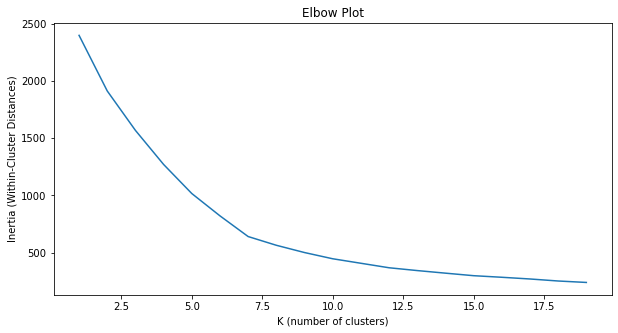

In [ ]:
# K-means methods
# loop through 1-10 clusters, running K-Means for each.
# elbow, the peak
inertias = []
# the highest point. undefined for K=1
silhouettes = []
ch_coeffs = []

train_data = df1.drop(columns="Class")
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(train_data)
    inertias.append(kmeans.inertia_)
    if k > 1:
      silhouettes.append(metrics.silhouette_score(train_data, kmeans.labels_))
      ch_coeffs.append(metrics.calinski_harabasz_score(train_data, kmeans.labels_))

plt.figure(figsize=(10,5))
plt.plot(range(1,20), inertias)
plt.xlabel("K (number of clusters)")
plt.ylabel("Inertia (Within-Cluster Distances)")
plt.title("Elbow Plot")
plt.show()

In [ ]:
#!pip install kneed # To install only knee-detection algorithm
#!pip install kneed[plot]
#import kneed

As shown in the above plot, we can see that after K=7, the plot flattens out substantially.

Also generate other plots, which will tell us our K by peaking at a particular value:

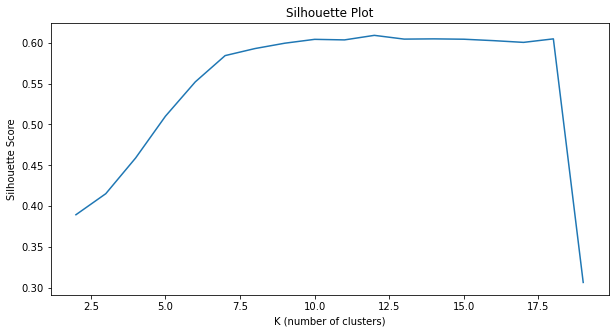

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,20), silhouettes)
plt.xlabel("K (number of clusters)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Plot")
plt.show()

As shown in the above plot, we can see that it would be better if K=7

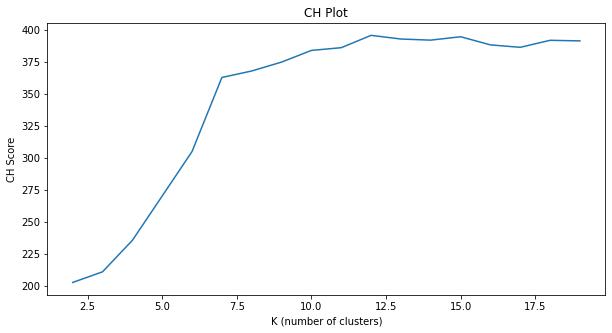

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,20), ch_coeffs)
plt.xlabel("K (number of clusters)")
plt.ylabel("CH Score")
plt.title("CH Plot")
plt.show()

As shown in the above plot, we can see that it would be better if K=7

And next generate other function Hierarchical Clustering-AgglomerativeClustering

In [ ]:
# This is just a plotting function
# Hierarchical Clustering
# sklearn, AgglomerativeClustering, bottom-up
# greedy algorithm
# selection based on some local optimum

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

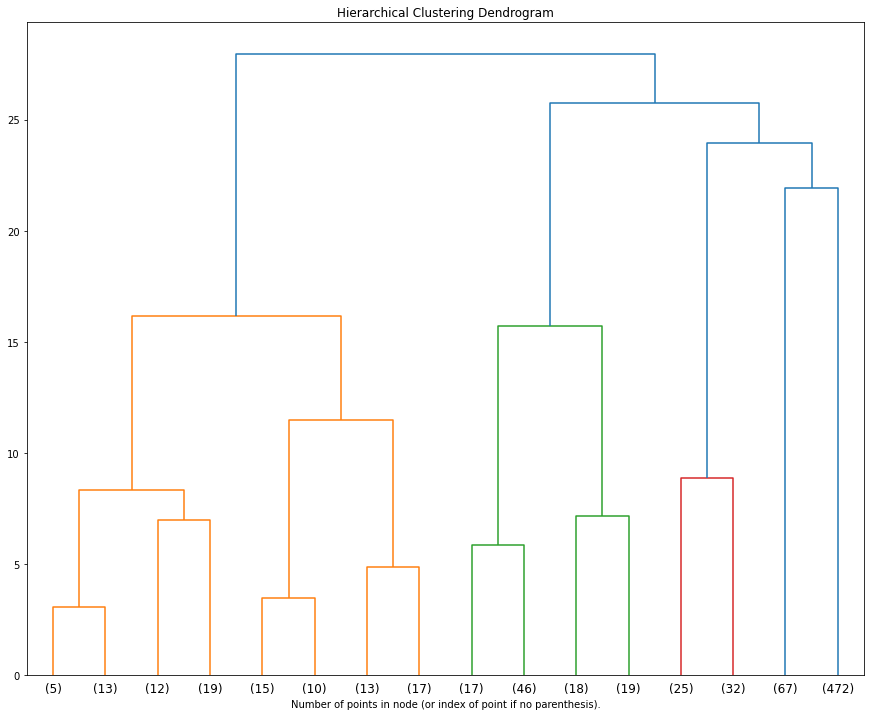

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df1.drop(columns=["Class"]))

plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top four levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

As shown in the above plot, we can see a decrease in the distance metric when going from 5 to 6 clusters and even from 7 to 8.

Now, conclusion for the clusters: we choose K=7. 

### 1.2 Step2: Evaluate the performance of the clustering algorithm using external validation metrics.

In [ ]:
# external validation metrics - Kmeans
# For precision, recall, and Jaccard
# None, 'micro', 'macro', 'weighted'
# n_init is the number of time the k-means algorithm will be run with different centroid seeds.
# K-means clustering does involve a random selection process for the initial centroid guesses, so you may get different results from different runs.
# class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
#init{‘k-means++’, ‘random’}
# fit
# 0/1 label
df1_labels_binary = df1.iloc[:,3].replace({1:0,2:1})

# fit model
mdl_df1 = KMeans(n_clusters=7)
mdl_df1.fit(df1.iloc[:, 0:3])
mdl_labels = mdl_df1.labels_
# Convert multiclass predictions to binary by using argmax to select the class with highest probability
mdl_labels = [1 if i == 0 else 0 for i in mdl_labels]


#print(f"Macro Precision: {metrics.precision_score(df1_labels_binary, mdl_labels, average='macro')}")
print(f"Precision: {metrics.precision_score(df1_labels_binary, mdl_labels)}")
print(f"Recall: {metrics.recall_score(df1_labels_binary, mdl_labels)}")
print(f"Jaccard: {metrics.jaccard_score(df1_labels_binary, mdl_labels)}")
print(f"Rand: {metrics.rand_score(df1_labels_binary, mdl_labels)}")
print(f"FM: {metrics.fowlkes_mallows_score(df1_labels_binary, mdl_labels)}")
#print(f"inertia: {mdl_df1.inertia_}")


Precision: 1.0
Recall: 1.0
Jaccard: 1.0
Rand: 1.0
FM: 1.0


In [ ]:
# take down Parameters
# ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.
# cluster_centers_ndarray of shape (n_clusters, n_features)
# labels_ndarray of shape (n_samples,)

cluster_centers = mdl_df1.cluster_centers_
labels = mdl_df1.labels_
inertia = mdl_df1.inertia_


In [ ]:
# external validation metrics - Hierarchical
mdl_df1_Hierarchical = AgglomerativeClustering(n_clusters=7)
mdl_df1_Hierarchical = mdl_df1_Hierarchical.fit(df1.iloc[:, 0:3])

mdl_df1_Hierarchical_labels = mdl_df1_Hierarchical.labels_
# Convert multiclass predictions to binary by using argmax to select the class with highest probability
# mdl_df1_Hierarchical_labels = [1 if i == 0 else 0 for i in mdl_df1_Hierarchical_labels]

#print(f"Macro Precision: {metrics.precision_score(df1_labels_binary, mdl_labels, average='macro')}")

print(f"Precision: {metrics.precision_score(df1_labels_binary, mdl_df1_Hierarchical_labels, average='micro')}")
print(f"Recall: {metrics.recall_score(df1_labels_binary, mdl_df1_Hierarchical_labels, average='micro')}")
print(f"Jaccard: {metrics.jaccard_score(df1_labels_binary, mdl_df1_Hierarchical_labels, average='micro')}")
print(f"Rand: {metrics.rand_score(df1_labels_binary, mdl_df1_Hierarchical_labels)}")
print(f"FM: {metrics.fowlkes_mallows_score(df1_labels_binary, mdl_df1_Hierarchical_labels)}")



Precision: 0.125
Recall: 0.125
Jaccard: 0.06666666666666667
Rand: 0.7940362953692115
FM: 0.7665222703727815


## 1.3 Step3: Plot (2D or 3D) the data points for each dataset and color them according to the original class

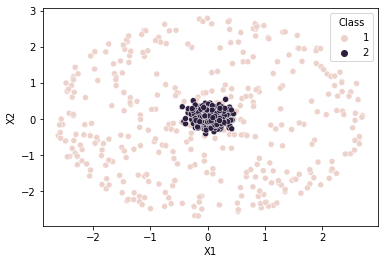

In [ ]:
# 2D
sns.scatterplot(x='X1', y='X2', data=df1, hue='Class')
plt.show()

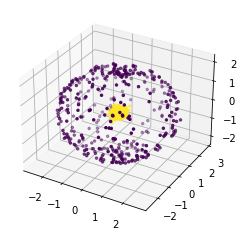

In [ ]:
# 3D 
# original class
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df1['X1'])
y = np.array(df1['X2'])
z = np.array(df1['X3'])

ax.scatter(x,y,z, s=6, c=df1_labels_binary.astype(float))
plt.show()

### 1.4 Step4: Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by each clustering algorithm

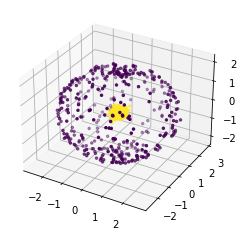

In [ ]:
# 3D
# Kmeans clustering algorithm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df1['X1'])
y = np.array(df1['X2'])
z = np.array(df1['X3'])

ax.scatter(x,y,z, s=6, c=mdl_labels)
plt.show()

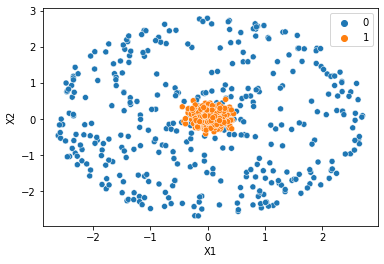

In [ ]:
# 2D
# Kmeans clustering algorithm
sns.scatterplot(x='X1', y='X2', data=df1, hue=mdl_labels)
plt.show()

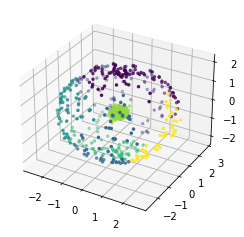

In [ ]:
# 3D
# Hierarchical clustering algorithm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df1['X1'])
y = np.array(df1['X2'])
z = np.array(df1['X3'])

ax.scatter(x,y,z, s=6, c=mdl_df1_Hierarchical_labels.astype(float))
plt.show()

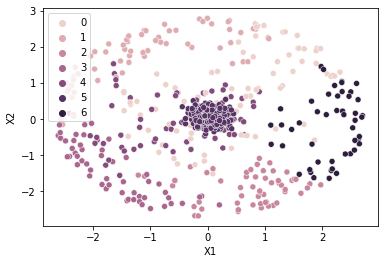

In [ ]:
# 2D
# Hierarchical clustering algorithm
sns.scatterplot(x='X1', y='X2', data=df1, hue=mdl_df1_Hierarchical_labels)
plt.show()

We can see from the above plots that, for Kmeans, we set K=7 to train a clutering model, and then evaluate performance by converting to a binary class. Intuitively, it performs well in the prediction plot and validation valuses compared to real data. Also interestingly, for Hierarchical, we don't merge outiler point to one cluster, as shown in the precision value and its plot, the core points are well classfied into one, which is right with the real data.(Kmeans performs same before merging the 6 outlier clustrs).

Data set 2

In [ ]:
display(df2.head())
display(df2["Class"].value_counts())

,X1,X2,X3,Class
0,-0.908199,-1.509643,0.063015,1
1,1.348445,-1.458211,0.059138,1
2,0.828152,0.552221,0.013250,1
3,0.210329,0.708804,0.028900,1
4,1.085238,-1.566790,0.093212,1


1    500
2    500
Name: Class, dtype: int64

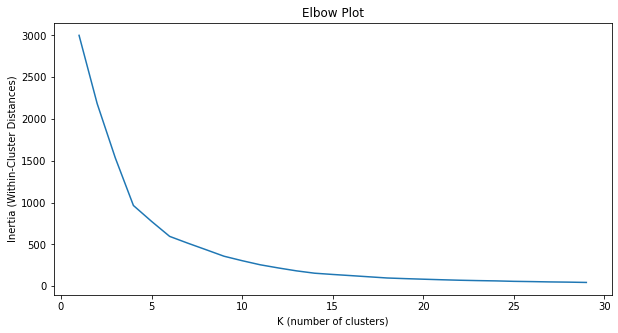

In [ ]:
# K-means methods
# loop through 1-10 clusters, running K-Means for each.
# elbow, the peak
inertias = []
# the highest point. undefined for K=1
silhouettes = []
ch_coeffs = []

train_data = df2.drop(columns="Class")
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(train_data)
    inertias.append(kmeans.inertia_)
    if k > 1:
      silhouettes.append(metrics.silhouette_score(train_data, kmeans.labels_))
      ch_coeffs.append(metrics.calinski_harabasz_score(train_data, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(1,30), inertias)
plt.xlabel("K (number of clusters)")
plt.ylabel("Inertia (Within-Cluster Distances)")
plt.title("Elbow Plot")
plt.show()

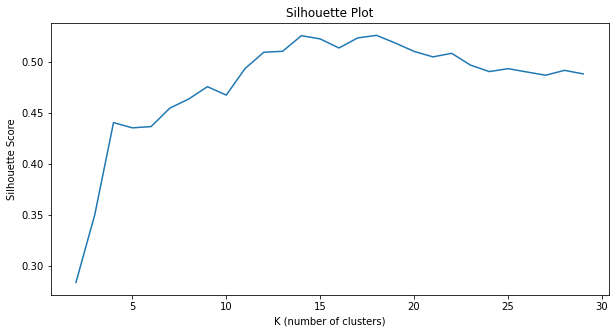

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,30), silhouettes)
plt.xlabel("K (number of clusters)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Plot")
plt.show()

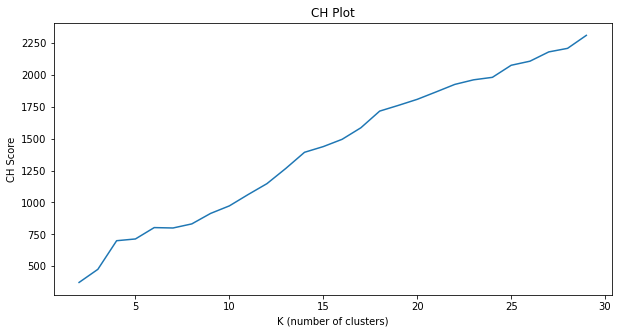

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,30), ch_coeffs)
plt.xlabel("K (number of clusters)")
plt.ylabel("CH Score")
plt.title("CH Plot")
plt.show()

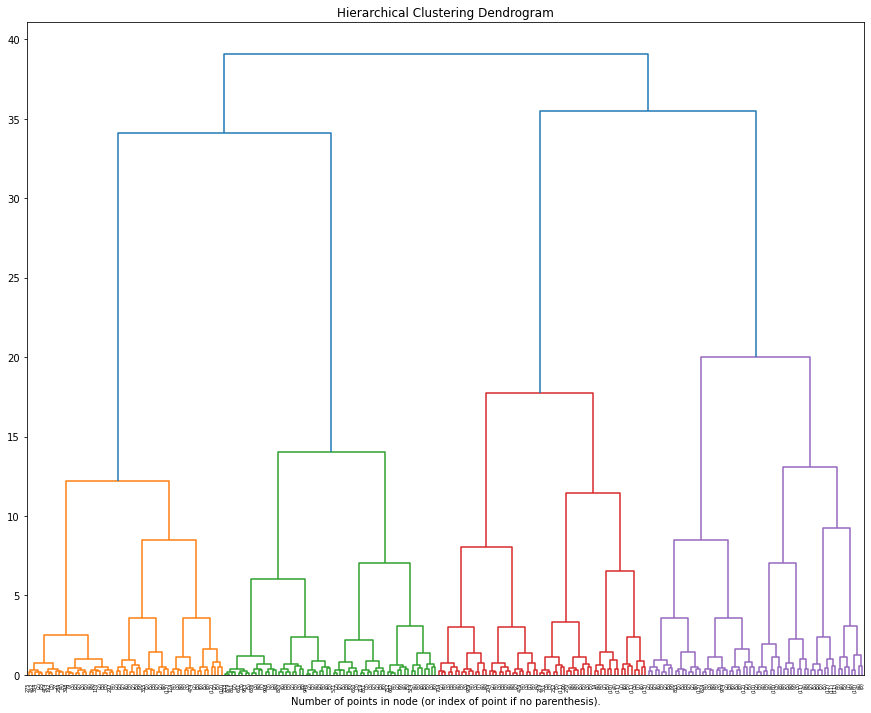

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df2.drop(columns=["Class"]))

plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top four levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

K=4

In [ ]:
# external validation metrics - Kmeans
# For precision, recall, and Jaccard
# None, 'micro', 'macro', 'weighted'
# n_init is the number of time the k-means algorithm will be run with different centroid seeds.
# K-means clustering does involve a random selection process for the initial centroid guesses, so you may get different results from different runs.
# class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
#init{‘k-means++’, ‘random’}
# fit
# 0/1 label
df2_labels_binary = df2.iloc[:,3].replace({1:0,2:1})

# fit model
mdl_df2 = KMeans(n_clusters=4)
mdl_df2.fit(df2.iloc[:, 0:3])
mdl_df2_labels = mdl_df2.labels_
# Convert multiclass predictions to binary by using argmax to select the class with highest probability
mdl_df2_labels = [1 if i == 0 else 0 for i in mdl_df2_labels]

#print(f"Macro Precision: {metrics.precision_score(df2_labels_binary, mdl_labels, average='macro')}")
print(f"Precision: {metrics.precision_score(df2_labels_binary, mdl_df2_labels)}")
print(f"Recall: {metrics.recall_score(df2_labels_binary, mdl_df2_labels)}")
print(f"Jaccard: {metrics.jaccard_score(df2_labels_binary, mdl_df2_labels)}")
print(f"Rand: {metrics.rand_score(df2_labels_binary, mdl_df2_labels)}")
print(f"FM: {metrics.fowlkes_mallows_score(df2_labels_binary, mdl_df2_labels)}")
#print(f"inertia: {mdl_df2.inertia_}")


Precision: 0.0
Recall: 0.0
Jaccard: 0.0
Rand: 0.5955175175175175
FM: 0.6565844099485311


In [ ]:
# external validation metrics - Hierarchical
mdl_df2_Hierarchical = AgglomerativeClustering(n_clusters=4)
mdl_df2_Hierarchical = mdl_df2_Hierarchical.fit(df2.iloc[:, 0:3])

mdl_df2_Hierarchical_labels = mdl_df2_Hierarchical.labels_
# Convert multiclass predictions to binary by using argmax to select the class with highest probability
mdl_df2_Hierarchical_labels = [1 if i == 0 else 0 for i in mdl_df2_Hierarchical_labels]

#print(f"Macro Precision: {metrics.precision_score(df2_labels_binary, mdl_labels, average='macro')}")

print(f"Precision: {metrics.precision_score(df2_labels_binary, mdl_df2_Hierarchical_labels, average = None)}")
print(f"Recall: {metrics.recall_score(df2_labels_binary, mdl_df2_Hierarchical_labels, average = None)}")
print(f"Jaccard: {metrics.jaccard_score(df2_labels_binary, mdl_df2_Hierarchical_labels, average='micro')}")
print(f"Rand: {metrics.rand_score(df2_labels_binary, mdl_df2_Hierarchical_labels)}")
print(f"FM: {metrics.fowlkes_mallows_score(df2_labels_binary, mdl_df2_Hierarchical_labels)}")


Precision: [0.62258544 0.75229358]
Recall: [0.838 0.492]
Jaccard: 0.49812734082397003
Rand: 0.554004004004004
FM: 0.579747559477852


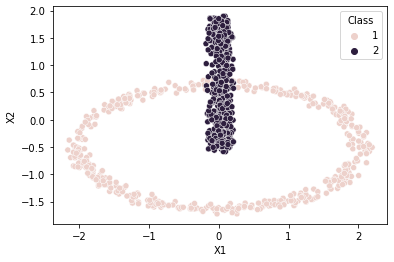

In [ ]:
# 2D
sns.scatterplot(x='X1', y='X2', data=df2, hue='Class')
plt.show()

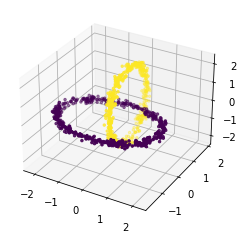

In [ ]:
# 3D 
# original class
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df2['X1'])
y = np.array(df2['X2'])
z = np.array(df2['X3'])

ax.scatter(x,y,z, s=6, c=df2_labels_binary.astype(float))
plt.show()

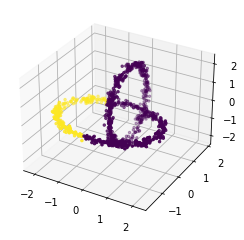

In [ ]:
# 3D
# Kmeans clustering algorithm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df2['X1'])
y = np.array(df2['X2'])
z = np.array(df2['X3'])

ax.scatter(x,y,z, s=6, c=mdl_df2_labels)
plt.show()

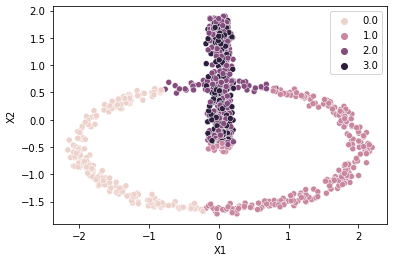

In [ ]:
# 2D
sns.scatterplot(x='X1', y='X2', data=df2, hue=mdl_df2.labels_.astype(float))
plt.show()

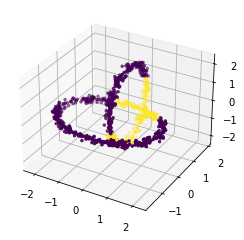

In [ ]:
# 3D
# Hierarchical clustering algorithm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df2['X1'])
y = np.array(df2['X2'])
z = np.array(df2['X3'])

ax.scatter(x,y,z, s=6, c=mdl_df2_Hierarchical_labels)
plt.show()

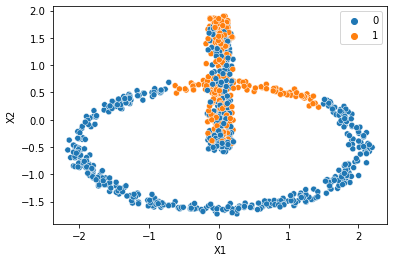

In [ ]:
# 2D
sns.scatterplot(x='X1', y='X2', data=df2, hue=mdl_df2_Hierarchical_labels)
plt.show()

We can see from the above that, both methods performs not bad on this data set.

Data set 3

In [ ]:
display(df3.head())
display(df3["Class"].value_counts())

,X1,X2,X3,Class
0,1.321572,0.130595,-0.456249,1
1,1.449107,0.033830,-0.307459,1
2,1.098876,0.350555,-0.489521,1
3,1.509820,0.371916,-0.599494,1
4,1.666736,0.164059,-0.551216,1


1    100
2    100
3    100
4    100
Name: Class, dtype: int64

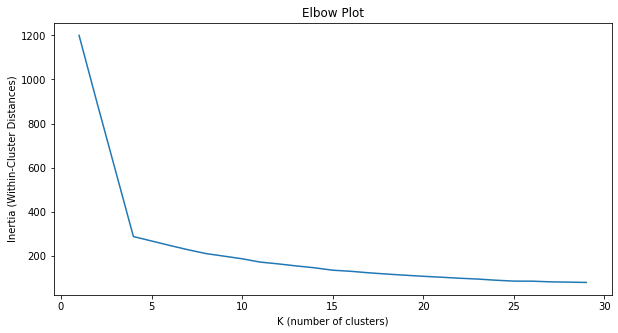

In [ ]:
# K-means methods
# loop through 1-10 clusters, running K-Means for each.
# elbow, the peak
inertias = []
# the highest point. undefined for K=1
silhouettes = []
ch_coeffs = []

train_data = df3.drop(columns="Class")
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(train_data)
    inertias.append(kmeans.inertia_)
    if k > 1:
      silhouettes.append(metrics.silhouette_score(train_data, kmeans.labels_))
      ch_coeffs.append(metrics.calinski_harabasz_score(train_data, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(1,30), inertias)
plt.xlabel("K (number of clusters)")
plt.ylabel("Inertia (Within-Cluster Distances)")
plt.title("Elbow Plot")
plt.show()

K=4

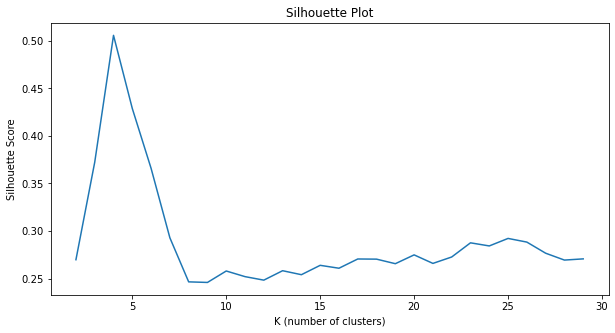

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,30), silhouettes)
plt.xlabel("K (number of clusters)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Plot")
plt.show()

K=4

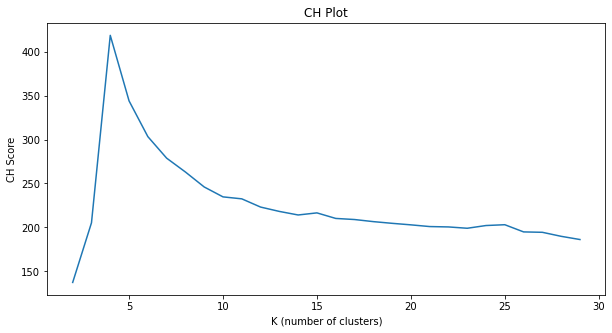

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,30), ch_coeffs)
plt.xlabel("K (number of clusters)")
plt.ylabel("CH Score")
plt.title("CH Plot")
plt.show()

K=4

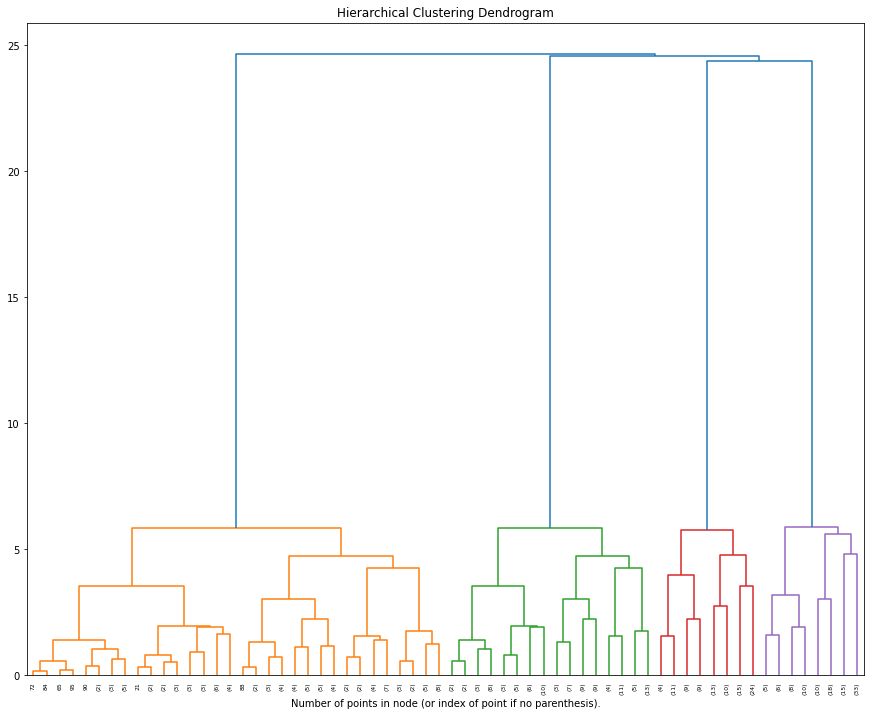

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df3.drop(columns=["Class"]))

plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top four levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

K=4

In [ ]:
# external validation metrics - Kmeans
# For precision, recall, and Jaccard
# None, 'micro', 'macro', 'weighted'
# n_init is the number of time the k-means algorithm will be run with different centroid seeds.
# K-means clustering does involve a random selection process for the initial centroid guesses, so you may get different results from different runs.
# class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
#init{‘k-means++’, ‘random’}
# fit
# 0/1 label
df3_labels_binary = df3.iloc[:,3].replace({1:0,2:1,3:2,4:3})

# fit model
mdl_df3 = KMeans(n_clusters=4)
mdl_df3.fit(df3.iloc[:, 0:3])


#print(f"Macro Precision: {metrics.precision_score(df3_labels_binary, mdl_labels, average='macro')}")
print(f"Precision: {metrics.precision_score(df3_labels_binary, mdl_df3.labels_, average = None)}")
print(f"Recall: {metrics.recall_score(df3_labels_binary, mdl_df3.labels_, average = None)}")
print(f"Jaccard: {metrics.jaccard_score(df3_labels_binary, mdl_df3.labels_, average = 'micro')}")
print(f"Rand: {metrics.rand_score(df3_labels_binary, mdl_df3.labels_)}")
print(f"FM: {metrics.fowlkes_mallows_score(df3_labels_binary, mdl_df3.labels_)}")
#print(f"inertia: {mdl_df3.inertia_}")

Precision: [1. 1. 0. 0.]
Recall: [1. 1. 0. 0.]
Jaccard: 0.3333333333333333
Rand: 1.0
FM: 1.0


In [ ]:
# external validation metrics - Hierarchical
mdl_df3_Hierarchical = AgglomerativeClustering(n_clusters=4)
mdl_df3_Hierarchical = mdl_df3_Hierarchical.fit(df3.iloc[:, 0:3])

mdl_df3_Hierarchical_labels = mdl_df3_Hierarchical.labels_

#print(f"Macro Precision: {metrics.precision_score(df3_labels_binary, mdl_labels, average='macro')}")

print(f"Precision: {metrics.precision_score(df3_labels_binary, mdl_df3_Hierarchical.labels_, average = None)}")
print(f"Recall: {metrics.recall_score(df3_labels_binary, mdl_df3_Hierarchical.labels_, average = None)}")
print(f"Jaccard: {metrics.jaccard_score(df3_labels_binary, mdl_df3_Hierarchical.labels_, average='micro')}")
print(f"Rand: {metrics.rand_score(df3_labels_binary, mdl_df3_Hierarchical_labels)}")
print(f"FM: {metrics.fowlkes_mallows_score(df3_labels_binary, mdl_df3_Hierarchical_labels)}")

Precision: [0. 0. 0. 0.]
Recall: [0. 0. 0. 0.]
Jaccard: 0.0
Rand: 0.9877819548872181
FM: 0.9753945158961902


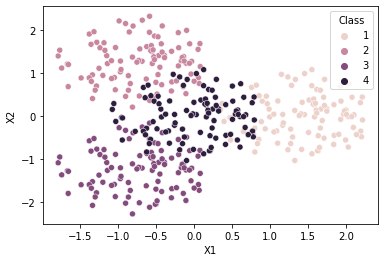

In [ ]:
# 2D
sns.scatterplot(x='X1', y='X2', data=df3, hue='Class')
plt.show()

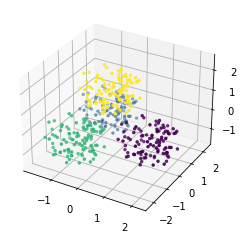

In [ ]:
# 3D 
# original class
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df3['X1'])
y = np.array(df3['X2'])
z = np.array(df3['X3'])

ax.scatter(x,y,z, s=6, c=df3_labels_binary.astype(float))
plt.show()

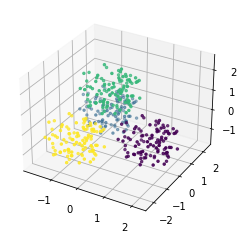

In [ ]:
# 3D
# Kmeans clustering algorithm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df3['X1'])
y = np.array(df3['X2'])
z = np.array(df3['X3'])

ax.scatter(x,y,z, s=6, c=mdl_df3.labels_.astype(float))
plt.show()

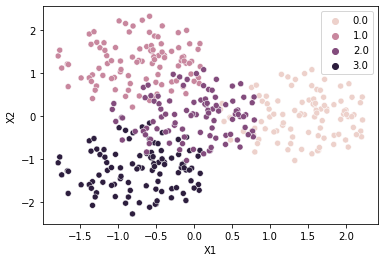

In [ ]:
# 2D
sns.scatterplot(x='X1', y='X2', data=df3, hue=mdl_df3.labels_.astype(float))
plt.show()

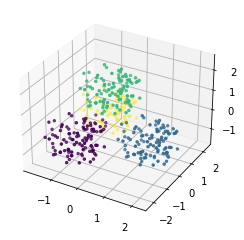

In [ ]:
# 3D
# Hierarchical clustering algorithm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df3['X1'])
y = np.array(df3['X2'])
z = np.array(df3['X3'])

ax.scatter(x,y,z, s=6, c=mdl_df3_Hierarchical_labels.astype(float))
plt.show()

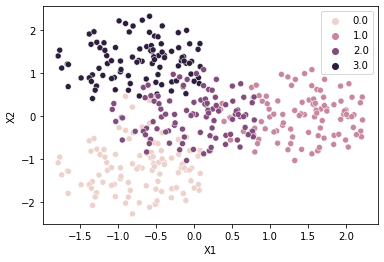

In [ ]:
# 2D
sns.scatterplot(x='X1', y='X2', data=df3, hue=mdl_df3_Hierarchical_labels.astype(float))
plt.show()

We can see from the above that, evaluation values and plots all perform well approching to the real data.

Data set 4

In [ ]:
display(df4.head())
display(df4["Class"].value_counts())

,X,Y,C,Class
0,1.220139,-0.671883,-0.889444,1
1,-1.403171,-1.101525,-0.263719,1
2,-1.511213,-0.827694,-1.163142,1
3,0.088664,-1.055806,-0.535781,1
4,-1.583708,-0.909727,-0.699923,1


1    200
2    100
3    100
4      4
Name: Class, dtype: int64

In [ ]:
# balance data class
from sklearn.utils import resample

df4_2 = df4[df4.Class==2]
df4_3 = df4[df4.Class==3]
df4_1 = df4[df4.Class==1]
df4_4 = df4[df4.Class==4]

# Upsample minority class
df4_4 = resample(df4_4, 
                 replace=True,     # sample with replacement
                 n_samples=100,    # to match majority class
                 random_state=42)  # reproducible results
df4_1 = resample(df4_1, 
                 replace=False,     # sample with replacement
                 n_samples=100,    # to match majority class
                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df4_resample = pd.concat([df4_1, df4_2, df4_3, df4_4])

# Display new class counts
df4_resample.Class.value_counts()

1    100
2    100
3    100
4    100
Name: Class, dtype: int64

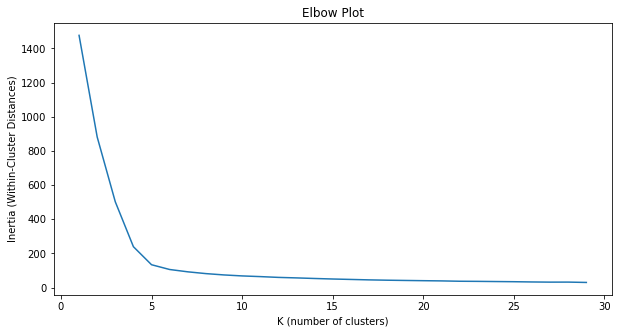

In [ ]:
# K-means methods
# loop through 1-10 clusters, running K-Means for each.
# elbow, the peak
inertias = []
# the highest point. undefined for K=1
silhouettes = []
ch_coeffs = []

train_data = df4_resample.drop(columns="Class")
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(train_data)
    inertias.append(kmeans.inertia_)
    if k > 1:
      silhouettes.append(metrics.silhouette_score(train_data, kmeans.labels_))
      ch_coeffs.append(metrics.calinski_harabasz_score(train_data, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(1,30), inertias)
plt.xlabel("K (number of clusters)")
plt.ylabel("Inertia (Within-Cluster Distances)")
plt.title("Elbow Plot")
plt.show()

K=4

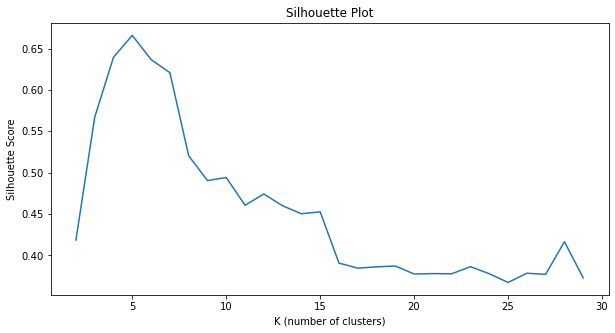

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,30), silhouettes)
plt.xlabel("K (number of clusters)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Plot")
plt.show()

K=5

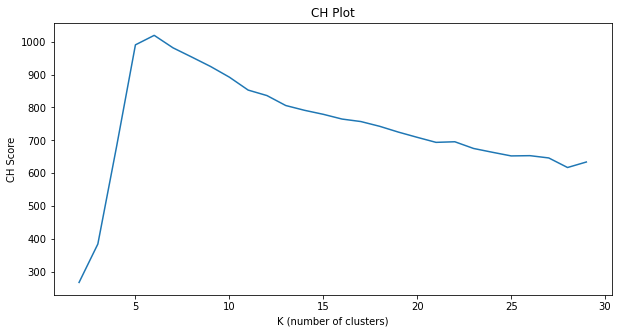

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,30), ch_coeffs)
plt.xlabel("K (number of clusters)")
plt.ylabel("CH Score")
plt.title("CH Plot")
plt.show()

K=5 or 6

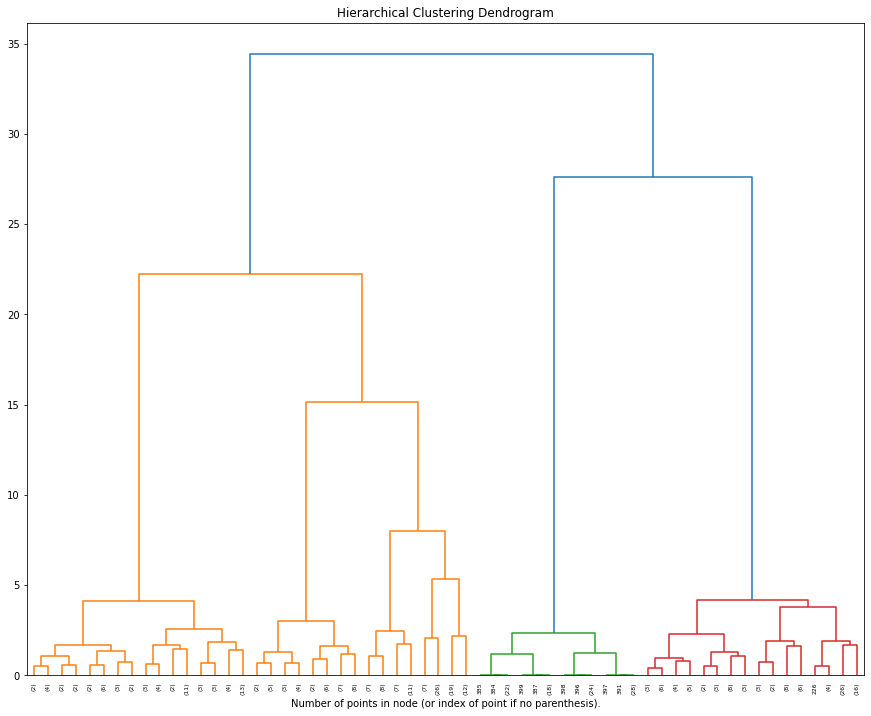

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df4_resample.drop(columns=["Class"]))

plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top four levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

K=4 or 5, we set 4

In [ ]:
# external validation metrics - Kmeans
# For precision, recall, and Jaccard
# None, 'micro', 'macro', 'weighted'
# n_init is the number of time the k-means algorithm will be run with different centroid seeds.
# K-means clustering does involve a random selection process for the initial centroid guesses, so you may get different results from different runs.
# class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
#init{‘k-means++’, ‘random’}
# fit
# 0/1 label
df4_labels_binary = df4_resample.iloc[:,3].replace({1:0,2:1,3:2,4:3})

# fit model
mdl_df4 = KMeans(n_clusters=4)
mdl_df4.fit(df4_resample.iloc[:, 0:3])


#print(f"Macro Precision: {metrics.precision_score(df4_labels_binary, mdl_labels, average='macro')}")
print(f"Precision: {metrics.precision_score(df4_labels_binary, mdl_df4.labels_, average = None)}")
print(f"Recall: {metrics.recall_score(df4_labels_binary, mdl_df4.labels_, average = None)}")
print(f"Jaccard: {metrics.jaccard_score(df4_labels_binary, mdl_df4.labels_, average = 'micro')}")
print(f"Rand: {metrics.rand_score(df4_labels_binary, mdl_df4.labels_)}")
print(f"FM: {metrics.fowlkes_mallows_score(df4_labels_binary, mdl_df4.labels_)}")
#print(f"inertia: {mdl_df4.inertia_}")

Precision: [0.         0.15254237 0.         0.        ]
Recall: [0.   0.18 0.   0.  ]
Jaccard: 0.023017902813299233
Rand: 0.9589473684210527
FM: 0.9179743231843117


In [ ]:
# external validation metrics - Hierarchical
mdl_df4_Hierarchical = AgglomerativeClustering(n_clusters=4)
mdl_df4_Hierarchical = mdl_df4_Hierarchical.fit(df4_resample.iloc[:, 0:3])

mdl_df4_Hierarchical_labels = mdl_df4_Hierarchical.labels_

#print(f"Macro Precision: {metrics.precision_score(df4_labels_binary, mdl_labels, average='macro')}")

print(f"Precision: {metrics.precision_score(df4_labels_binary, mdl_df4_Hierarchical_labels, average = None)}")
print(f"Recall: {metrics.recall_score(df4_labels_binary, mdl_df4_Hierarchical_labels, average = None)}")
print(f"Jaccard: {metrics.jaccard_score(df4_labels_binary, mdl_df4_Hierarchical_labels, average='micro')}")
print(f"Rand: {metrics.rand_score(df4_labels_binary, mdl_df4_Hierarchical_labels)}")
print(f"FM: {metrics.fowlkes_mallows_score(df4_labels_binary, mdl_df4_Hierarchical_labels)}")

Precision: [0.74626866 0.         0.         0.        ]
Recall: [1. 0. 0. 0.]
Jaccard: 0.14285714285714285
Rand: 0.9292731829573935
FM: 0.861864082385945


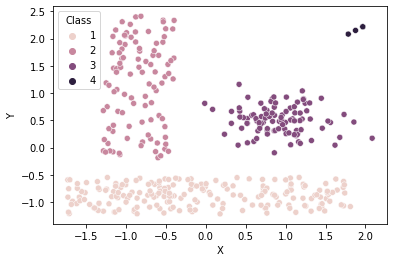

In [ ]:
# 2D
# orig data
sns.scatterplot(x='X', y='Y', data=df4, hue='Class')
plt.show()

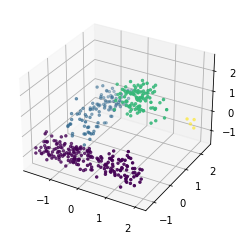

In [ ]:
# 3D 
# original class of resample
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df4['X'])
y = np.array(df4['Y'])
z = np.array(df4['C'])
c = df4.iloc[:,3].replace({1:0,2:1,3:2,4:3})

ax.scatter(x,y,z, s=6, c=c.astype(float))
plt.show()

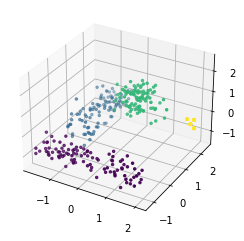

In [ ]:
# 3D 
# original class of resample
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df4_resample['X'])
y = np.array(df4_resample['Y'])
z = np.array(df4_resample['C'])
c = df4_resample.iloc[:,3].replace({1:0,2:1,3:2,4:3})

ax.scatter(x,y,z, s=6, c=c.astype(float))
plt.show()

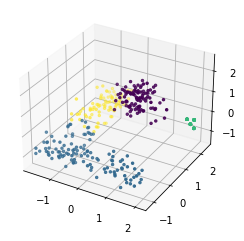

In [ ]:
# 3D
# Kmeans clustering algorithm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df4_resample['X'])
y = np.array(df4_resample['Y'])
z = np.array(df4_resample['C'])

ax.scatter(x,y,z, s=6, c=mdl_df4.labels_.astype(float))
plt.show()

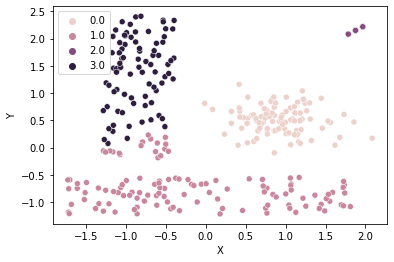

In [ ]:
# 2D
sns.scatterplot(x='X', y='Y', data=df4_resample, hue=mdl_df4.labels_.astype(float))
plt.show()

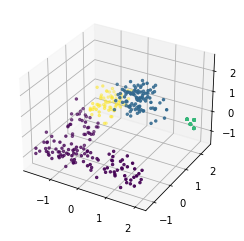

In [ ]:
# 3D
# Hierarchical clustering algorithm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df4_resample['X'])
y = np.array(df4_resample['Y'])
z = np.array(df4_resample['C'])

ax.scatter(x,y,z, s=6, c=mdl_df4_Hierarchical_labels.astype(float))
plt.show()

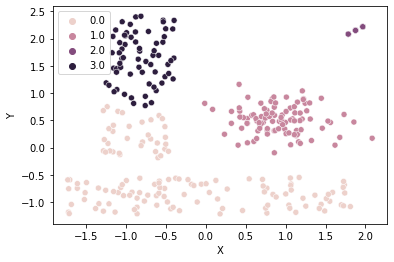

In [ ]:
# 2D
sns.scatterplot(x='X', y='Y', data=df4_resample, hue=mdl_df4_Hierarchical_labels.astype(float))
plt.show()

We can see from the above that, balance sample data before model makes a better classification. Both methods preform well on this data set.

Data set 5

In [ ]:
display(df5.head())
display(df5["Class"].value_counts())

,X1,X2,X3,Class
0,-0.047871,-0.003870,0.035883,1
1,-0.009824,0.008417,0.064508,1
2,-0.046346,-0.025960,0.054592,1
3,-0.001317,-0.027637,0.055970,1
4,-0.042538,-0.022799,0.022994,1


1    32
2    30
3    30
4    30
5    30
6    30
7    30
Name: Class, dtype: int64

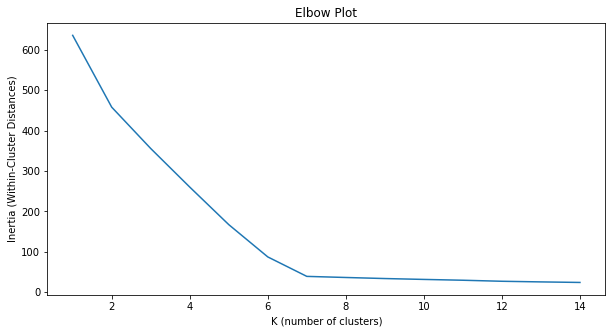

In [ ]:
# K-means methods
# loop through 1-10 clusters, running K-Means for each.
# elbow, the peak
inertias = []
# the highest point. undefined for K=1
silhouettes = []
ch_coeffs = []

train_data = df5.drop(columns="Class")
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(train_data)
    inertias.append(kmeans.inertia_)
    if k > 1:
      silhouettes.append(metrics.silhouette_score(train_data, kmeans.labels_))
      ch_coeffs.append(metrics.calinski_harabasz_score(train_data, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(1,15), inertias)
plt.xlabel("K (number of clusters)")
plt.ylabel("Inertia (Within-Cluster Distances)")
plt.title("Elbow Plot")
plt.show()

K=7

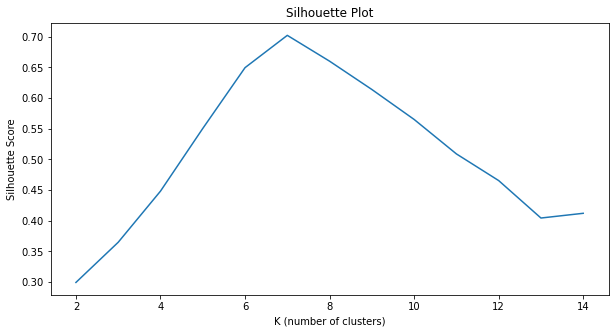

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,15), silhouettes)
plt.xlabel("K (number of clusters)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Plot")
plt.show()

K=7

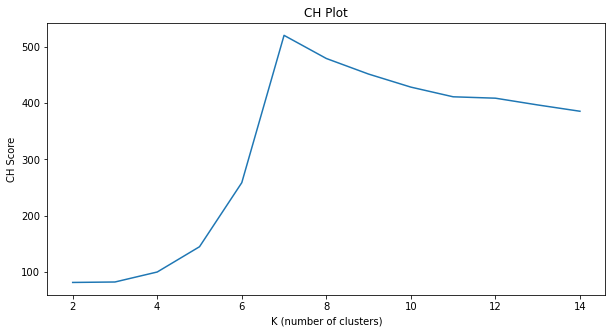

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,15), ch_coeffs)
plt.xlabel("K (number of clusters)")
plt.ylabel("CH Score")
plt.title("CH Plot")
plt.show()

K=7

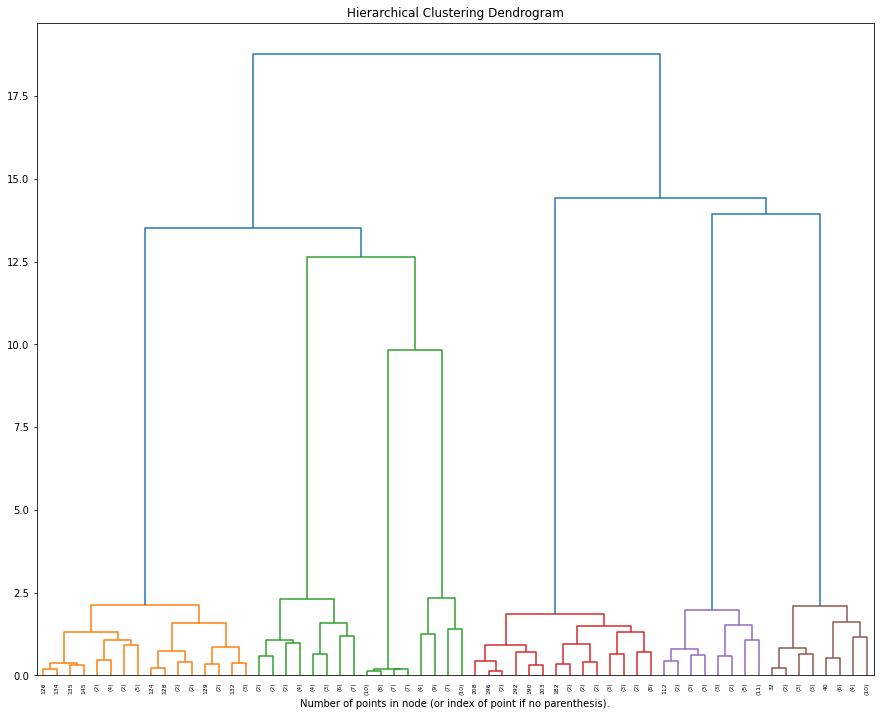

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df5.drop(columns=["Class"]))

plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top four levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

K=7

In [ ]:
# external validation metrics - Kmeans
# For precision, recall, and Jaccard
# None, 'micro', 'macro', 'weighted'
# n_init is the number of time the k-means algorithm will be run with different centroid seeds.
# K-means clustering does involve a random selection process for the initial centroid guesses, so you may get different results from different runs.
# class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
#init{‘k-means++’, ‘random’}
# fit
# 0/1 label
df5_labels_binary = df5.iloc[:,3].replace({1:0,2:1,3:2,4:3,5:4,6:5,7:6})

# fit model
mdl_df5 = KMeans(n_clusters=7)
mdl_df5.fit(df5.iloc[:, 0:3])

#print(f"Macro Precision: {metrics.precision_score(df5_labels_binary, mdl_labels, average='macro')}")
print(f"Precision: {metrics.precision_score(df5_labels_binary, mdl_df5.labels_, average = None)}")
print(f"Recall: {metrics.recall_score(df5_labels_binary, mdl_df5.labels_, average = None)}")
print(f"Jaccard: {metrics.jaccard_score(df5_labels_binary, mdl_df5.labels_, average = 'micro')}")
print(f"Rand: {metrics.rand_score(df5_labels_binary, mdl_df5.labels_)}")
print(f"FM: {metrics.fowlkes_mallows_score(df5_labels_binary, mdl_df5.labels_)}")
#print(f"inertia: {mdl_df5.inertia_}")

Precision: [1. 0. 0. 1. 0. 1. 0.]
Recall: [1. 0. 0. 1. 0. 1. 0.]
Jaccard: 0.27710843373493976
Rand: 1.0
FM: 1.0


In [ ]:
# external validation metrics - Hierarchical
mdl_df5_Hierarchical = AgglomerativeClustering(n_clusters=7)
mdl_df5_Hierarchical = mdl_df5_Hierarchical.fit(df5.iloc[:, 0:3])

mdl_df5_Hierarchical_labels = mdl_df5_Hierarchical.labels_

#print(f"Macro Precision: {metrics.precision_score(df5_labels_binary, mdl_labels, average='macro')}")

print(f"Precision: {metrics.precision_score(df5_labels_binary, mdl_df5_Hierarchical_labels, average = None)}")
print(f"Recall: {metrics.recall_score(df5_labels_binary, mdl_df5_Hierarchical_labels, average = None)}")
print(f"Jaccard: {metrics.jaccard_score(df5_labels_binary, mdl_df5_Hierarchical_labels, average='micro')}")
print(f"Rand: {metrics.rand_score(df5_labels_binary, mdl_df5_Hierarchical_labels)}")
print(f"FM: {metrics.fowlkes_mallows_score(df5_labels_binary, mdl_df5_Hierarchical_labels)}")


Precision: [0. 0. 1. 1. 0. 0. 0.]
Recall: [0. 0. 1. 1. 0. 0. 0.]
Jaccard: 0.16483516483516483
Rand: 1.0
FM: 1.0


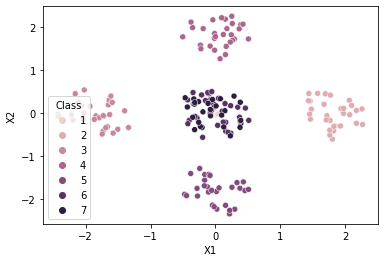

In [ ]:
# 2D
sns.scatterplot(x='X1', y='X2', data=df5, hue='Class')
plt.show()

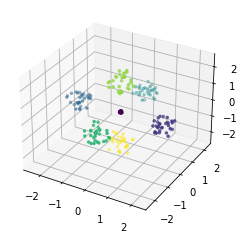

In [ ]:
# 3D 
# original class
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df5['X1'])
y = np.array(df5['X2'])
z = np.array(df5['X3'])

ax.scatter(x,y,z, s=6, c=df5_labels_binary.astype(float))
plt.show()

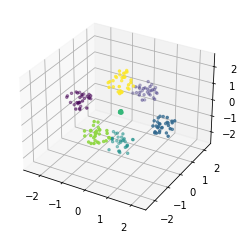

In [ ]:
# 3D
# Kmeans clustering algorithm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df5['X1'])
y = np.array(df5['X2'])
z = np.array(df5['X3'])

ax.scatter(x,y,z, s=6, c=mdl_df5.labels_.astype(float))
plt.show()

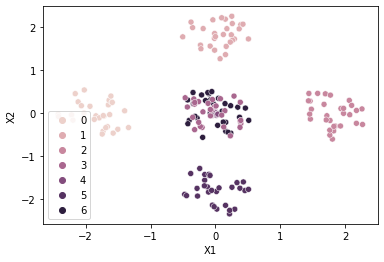

In [ ]:
# 2D
sns.scatterplot(x='X1', y='X2', data=df5, hue=mdl_df5.labels_.astype(float))
plt.show()

We can see from the above plots and evaluation value that, methods performs well.

# Task 2
The world indicators dataset compares different countries based on selected attributes. Do the following tasks using the “WorldIndicators.csv” dataset posted with the project: 
1. Use K-means and hierarchical clustering methods to group similar countries together 
2. Use internal validation metrics to report the cluster quality 
3. Report the best clustering solution. Give a detailed list of all the groups and the countries included within the groups 
4. Generate 3 different scatter plots of your choice and color the data points according to the group. (Example: “Life expectancy vs GDP”, “Infant Mortality vs GDP”, etc.)


In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np

In [ ]:
#Importing the dataset .csv
data = pd.read_csv("World Indicators.csv")

## Data Preprocessing

In [ ]:
#Display head of the dataset 
data.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [ ]:
# replacing all the special characters (%,$,,) with spaces 
data[["Business Tax Rate","GDP","Health Exp/Capita"]] = data[["Business Tax Rate","GDP","Health Exp/Capita"]].replace('[\%$,]',"",regex = True).astype(float)
data.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,NaN,1.039576e+10,0.064,39.0,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [ ]:
rows, cols = data.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 208
Columns: 20


In [ ]:
# This code snippet is to drop all the columns in the dataset which has more that 70 percent missing values 
data_col_drop = data.dropna(thresh=len(data) - 30, axis=1)


In [ ]:
rows, cols = data_col_drop.shape
print(f"Columns: {cols}")

Columns: 18


In [ ]:
# Here we try to remove all the rows with more than 70 percent missing values 
data_col_drop= data_col_drop.dropna(thresh=len(data_col_drop.columns)*0.7, axis=0)
rows, cols = data_col_drop.shape
print(f"Rows: {rows}")

Rows: 182


In [ ]:
X_features = data_col_drop.iloc[:,:-2].dropna(axis=0, thresh=len(data_col_drop.columns)*0.7)
X_features.shape


(180, 16)

In [ ]:
X_features.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265


In [ ]:
from sklearn.preprocessing import StandardScaler

#We could use Standard Scaler, MinMaxScaler or even Robust Scaler methods to scale our features. Robust scaler is used on datasets that have outliers, and since we do not have many outliers from visually viewing the dataset,
#We are left with either Min Max or Standar Scaler, since standard scaler method gets out dataset to a standard normal distrubution which is required for many manchine learning models,
#such as Kmeans and Heirarchical clustering we proceeded to go ahead witht the StandardScaler method 
scaler = StandardScaler()
#We fit the dataframe using standard scaler method
scaled_df = pd.DataFrame(scaler.fit_transform(X_features), columns = X_features.columns, index = X_features.index)

In [ ]:
# In the final step of data preprocessing we fill in all the missing values using either of the techinques mentioned below : 
# 1)Median/Mean 2) Mode imputation 3)Forward or backward fill 4)Interpolation 5)Model-based imputation
# Out of the above techinques Mean method looks the most appropriate since we scaled our data to the be a normal distrubution. Filling the missing value with mean is the most 
# suited method for a dataset that follows standard normal distrubution. Other methods such as interpolation and forward-backward fill is used mainly for time series data. 
# Mode method is used for categorical data, which is not our case
scaled_df = scaled_df.fillna(scaled_df.mean())

##Kmeans Clustering of Data

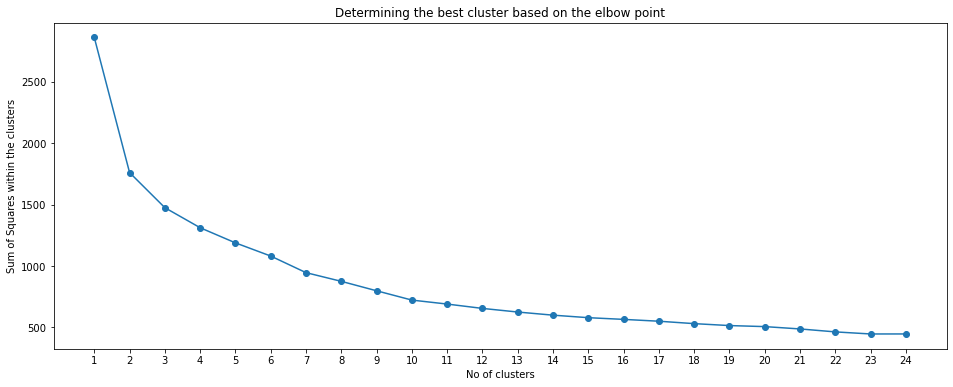

In [ ]:
#importing the neccessary libraries 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Here we are setting random seed to 42, so that we can get the same result everytime we run it. Usually Kmeans do not give the same data points in a cluster since they initialise
#random centroids, hence we set it to 42. It's not neccessarily the best solution or optimised solution but will give consistent results for the project 
np.random.seed(42)
#Sum of squares within the clusters 
ss = []
k=[]
# We are checking the within the cluster sum of squares for clusters 1, 2.....25 using the elbow method which is the most famous way of finding out which is the most suitable cluster 
for i in range(1,25):
    k_means = KMeans(n_clusters=i)
    k_means.fit(scaled_df)
    k.append(i)
    # calculate the sum of squares using intertia and append it to ss list 
    ss.append(k_means.inertia_)

# Plotting within-cluster sum of squares (inertia) vs number of clusters
plt.figure(figsize = (16, 6))
plt.xticks(k)
plt.plot(k, ss, marker = 'o')
plt.title('Determining the best cluster based on the elbow point')
plt.xlabel('No of clusters')
plt.ylabel('Sum of Squares within the clusters')
plt.show()

In [ ]:
# Since we can see that elbow is at 3 or 4 we choose 4. Later we shall try with 3 as well
final_cluster_fit = KMeans(n_clusters = 4)
final_cluster_fit.fit(scaled_df)    #we fit our scaled dataframe 
#The .labels_ attribute returns an array of integers, where each integer represents the cluster assignment for the corresponding data point in the original dataset. 
#In our dataset we apply KMeans clustering with 4 clusters, the .labels_ 
#attribute will return an array of of the number of data points , where each datappoint is between 0 and 3, representing the cluster assignment for each data point.
cluster1 = final_cluster_fit.labels_   
data_col_drop = data_col_drop.loc[X_features.index,:]

#We finally fit countries with our clusters 
data_col_drop['cluster1'] = cluster1
kmeans_df = data_col_drop[['Country', 'cluster1']]
kmeans_df

,Country,cluster1
0,Algeria,1
1,Angola,3
2,Benin,3
3,Botswana,1
4,Burkina Faso,3
...,...,...
201,Suriname,1
202,Trinidad and Tobago,0
204,United States,2
205,Uruguay,0


##Heirarchical Clustering




  1) We calculate the distance between each cluster pair using metrics such as the Euclidean or Manhattan distance

  2) Merge the 2 closest clusters using a linkage method.

  3) Recalculate the distance between the new cluster and the remaining clusters.

  4) Repeat steps 2 and 3 until all the clusters are one single cluster.

   5)  Construct a dendrogram to visualize the hierarchical relationships between clusters and cut it at a specific level to obtain the number of clusters desired.

  6) Once we obtained the number of clusters we can assign all the data points to their respective clusters based on their proximity to the cluster centroid.



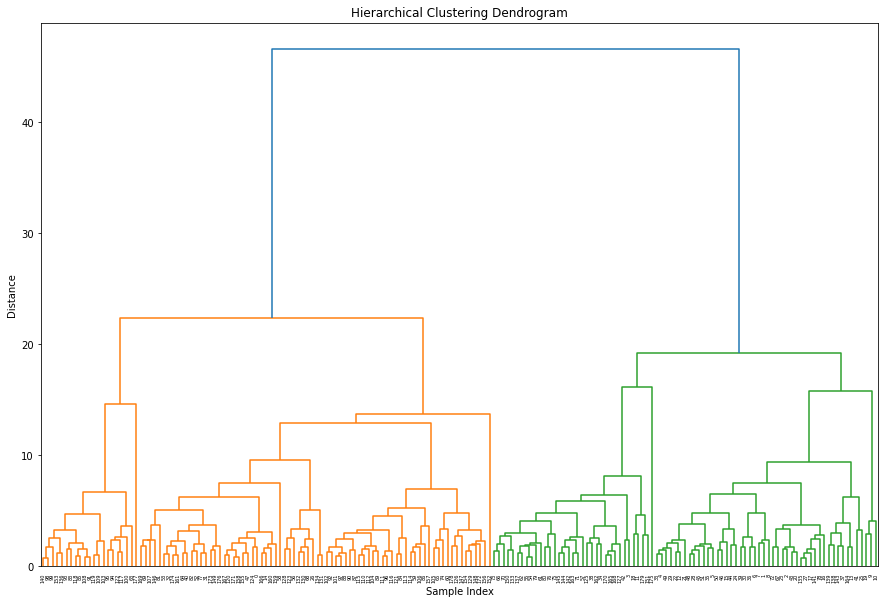

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Perform hierarchical clustering using Ward's linkage
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
clustering.fit(scaled_df)

# Add the cluster labels to the original data
data_col_drop['Cluster'] = clustering.labels_

# Plot the dendrogram to visualize the clustering
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(scaled_df, 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:

merging = linkage(scaled_df, method  = 'ward')
cluster2 = cut_tree(merging, n_clusters = 4)
data_col_drop['cluster2'] = cluster2
df = data_col_drop[['Country', 'cluster2']]
df

,Country,cluster2
0,Algeria,0
1,Angola,1
2,Benin,1
3,Botswana,2
4,Burkina Faso,1
...,...,...
201,Suriname,2
202,Trinidad and Tobago,0
204,United States,3
205,Uruguay,0


Internal Validation Techniques that can be used for Kmeans and Heirarchical clustering are as follows :

1) Elbow method: In k-means clustering, this method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters.

2) Silhouette analysis: This method measures how similar an object is to its own cluster compared to other clusters. A silhouette score of +1 indicates that the object is well-matched to its own cluster, while a score of -1 indicates that it is better suited to a neighboring cluster. A high average silhouette score across all clusters indicates that the clustering solution is appropriate.

3) Gap statistic: This method compares the WCSS for the clustering solution to a reference distribution of WCSS values obtained from random data. The optimal number of clusters is the one that maximizes the gap between the observed WCSS and the expected WCSS.

4) Dunn index: This method evaluates the ratio of the distance between the nearest and farthest points in each cluster to the distance between the nearest points in different clusters. The optimal number of clusters is the one that maximizes this ratio.

5) Calinski-Harabasz index: This method measures the ratio of the between-cluster variance to the within-cluster variance. The optimal number of clusters is the one that maximizes this ratio.

In [ ]:
!pip install validclust

In [ ]:
from sklearn import metrics
cluster2.shape = scaled_df.iloc[:, 0].shape
print(metrics.calinski_harabasz_score(scaled_df, cluster1))
print(metrics.calinski_harabasz_score(scaled_df, cluster2))

69.2707777268814
66.72924595062807


In [ ]:
from validclust import dunn
from sklearn.metrics import pairwise_distances
dist= pairwise_distances(scaled_df)
dunn1 = dunn(dist, cluster1)
dunn2 = dunn(dist, cluster2)
print(dunn1)
print(dunn2)

0.06569846212094148
0.10652632198936575


In [ ]:
# SH - Silhouette Coefficient
print(metrics.silhouette_score(scaled_df, cluster1))
print(metrics.silhouette_score(scaled_df, cluster2))

0.2179415858012423
0.21094652557215404


From the above metrics we can see that , calinski_harabasz_score and Silhouette Coefficient is higher in K means (cluster1). Although the Silhouette Coefficient isnt giving us a clear picture its still confirms that Kmeans maybe a better clustering solution to this problem.
If we remove the random seed, it will cluster different data points everytime due to random choice of initial centroid. We run it till it reaches an optimanl solution. In that case the metrics can also keep differing as.

In [ ]:
!pip install gap-stat

Now, We display the countries that falls into different clusters as asked in the Project. 

In [ ]:
# This code is to display all the datapoints( countries ) that falls into 4 clusters. 
cluster001 = []
cluster002 = []
cluster003 = []
cluster004 = []
cluster005 = []
cluster006 = []
kmeans_df.reset_index(inplace = True)
kmeans_df.index


n = len(kmeans_df['cluster1'])
for i in range(n):
    if kmeans_df['cluster1'][i] == 0:
        cluster001.append(kmeans_df['Country'][i])
    elif kmeans_df['cluster1'][i] == 1:
        cluster002.append(kmeans_df['Country'][i])
    elif kmeans_df['cluster1'][i] == 2:
      cluster003.append(kmeans_df['Country'][i])
    else:
      cluster004.append(kmeans_df['Country'][i])

In [ ]:
np.array(cluster001)

array(['Libya', 'Mauritius', 'Morocco', 'Seychelles', 'Tunisia',
       'Armenia', 'Azerbaijan', 'Brunei Darussalam', 'China', 'Georgia',
       'Hong Kong SAR, China', 'Kazakhstan', 'Korea, Rep.', 'Malaysia',
       'Maldives', 'Singapore', 'Thailand', 'Vietnam', 'Albania',
       'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czech Republic', 'Estonia', 'Hungary', 'Latvia',
       'Lithuania', 'Macedonia, FYR', 'Moldova', 'Montenegro', 'Poland',
       'Romania', 'Russian Federation', 'Serbia', 'Slovak Republic',
       'Slovenia', 'Turkey', 'Ukraine', 'Bahrain', 'Iran, Islamic Rep.',
       'Israel', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia',
       'United Arab Emirates', 'Antigua and Barbuda', 'Argentina',
       'Bahamas, The', 'Barbados', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Grenada', 'Jamaica', 'Mexico', 'Panama',
       'Peru', 'Puerto Rico', 'St. Lucia',
       'St. Vincent and the Grenadines', 'Trinidad and To

In [ ]:
np.array(cluster002)

array(['Algeria', 'Botswana', 'Djibouti', 'Egypt, Arab Rep.', 'Gabon',
       'Ghana', 'Namibia', 'Sao Tome and Principe', 'South Africa',
       'Bangladesh', 'Bhutan', 'Cambodia', 'India', 'Indonesia',
       'Kyrgyz Republic', 'Lao PDR', 'Mongolia', 'Nepal', 'Pakistan',
       'Philippines', 'Sri Lanka', 'Tajikistan', 'Turkmenistan',
       'Uzbekistan', 'Iraq', 'Jordan', 'Syrian Arab Republic', 'Fiji',
       'Kiribati', 'Micronesia, Fed. Sts.', 'Samoa', 'Solomon Islands',
       'Tonga', 'Vanuatu', 'Belize', 'Bolivia', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Nicaragua', 'Paraguay', 'Suriname'], dtype='<U21')

In [ ]:
np.array(cluster003)

array(['Japan', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'Australia', 'New Zealand',
       'Canada', 'United States'], dtype='<U14')

In [ ]:
np.array(cluster004)

array(['Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Gambia, The', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda',
       'Zambia', 'Zimbabwe', 'Afghanistan', 'Timor-Leste', 'Yemen, Rep.',
       'Papua New Guinea'], dtype='<U24')

**We plot 3 graphs with different features. 
1) Life Expectancy Female vs Health Exp/Capita
2) Infant Mortality Rate vs Health Exp/Capita
3) Life Expectancy Female vs GDP**

In [ ]:
data_col_drop.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,...,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,cluster1,Cluster,cluster2
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,...,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,1,2,0
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,...,0.5,0.477,0.499,0.024,0.409,Africa,Angola,3,1,1
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,...,0.8,0.432,0.539,0.029,0.423,Africa,Benin,3,1,1
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,...,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,1,0,2
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,...,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,3,1,1


[Text(0.5, 1.0, 'Life Expectancy Female vs Health Exp/Capita')]

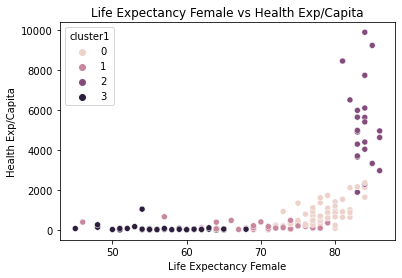

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'Life Expectancy Female', y = 'Health Exp/Capita', data = data_col_drop, hue = 'cluster1').set(title = 'Life Expectancy Female vs Health Exp/Capita')

[Text(0.5, 1.0, 'Infant Mortality Rate vs Health Exp/Capita')]

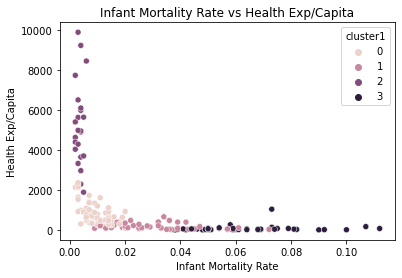

In [ ]:
sns.scatterplot(x = 'Infant Mortality Rate', y = 'Health Exp/Capita', data = data_col_drop, hue = 'cluster1').set(title = 'Infant Mortality Rate vs Health Exp/Capita')

[Text(0.5, 1.0, 'Life Expectancy Female vs GDP')]

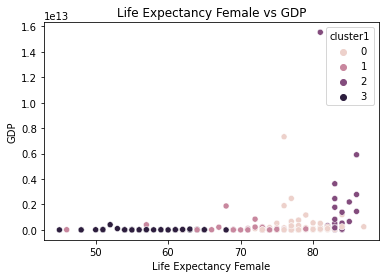

In [ ]:
sns.scatterplot(x = 'Life Expectancy Female', y = 'GDP', data = data_col_drop, hue = 'cluster1').set(title = 'Life Expectancy Female vs GDP')